# Experimenting with Bactesting Investment Strategies

## Strategies

1. Buy and hold. You are given a lump sum and you invest it right away

2. Buy and hold, with buy downturns (aka buy the dip)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from backtesting_dev import BuyAndHoldDrawDownStrategySignal, BuyAndHoldStrategySignal
from query_stocks import query_stock_prices

In [2]:
plt.style.use('seaborn-v0_8-pastel')


In [3]:
DOWNLOAD_DATA = False

In [4]:
if DOWNLOAD_DATA:
    start = datetime.date(2019, 1, 18)
    end = datetime.date(2024, 1, 18)
    #strat = BuyAndHoldStrategySignal('VOO', monies = 10000)
    data = query_stock_prices(['VOO'], start_date=start, end_date=end)
    print(data.head())

else:
    voo_df = pd.read_csv("data/voo_df.csv")

In [5]:
strat = BuyAndHoldStrategySignal('VOO', monies = 50000)
strat.run(data=voo_df)

1257it [00:00, 18637.13it/s]


In [6]:
holdings = strat.holdings.to_pandas()
profit_1 = holdings['quantity']*(strat.end_price - holdings['price'])
profit_1.sum()

38586.601867675796

In [7]:
holdings

,symbol,price,quantity,date
0,VOO,244.919998,204.0,2019-01-18


In [8]:
newstrat = BuyAndHoldDrawDownStrategySignal('VOO', monies=50000)
newstrat.run(data=voo_df)


newholdings = newstrat.holdings.to_pandas()
profit_2 = newholdings['quantity']*(newstrat.end_price - newholdings['price'])
profit_2.sum()



1257it [00:00, 17369.58it/s]


33540.87126159669

In [9]:
newholdings

,symbol,price,quantity,date
0,VOO,244.919998,10.0,2019-01-18
1,VOO,267.510010,1.0,2019-05-02
2,VOO,264.619995,1.0,2019-05-07
3,VOO,264.100006,1.0,2019-05-08
4,VOO,258.029999,2.0,2019-05-13
...,...,...,...,...
79,VOO,232.880005,4.0,2020-03-17
80,VOO,220.149994,4.0,2020-03-18
81,VOO,220.339996,4.0,2020-03-19
82,VOO,210.740005,4.0,2020-03-20


In [10]:
ts_voo = voo_df.set_index('Date')

In [11]:
ts_holdings_2 = newholdings.set_index('date') #.asfreq('D')

In [12]:
ts_voo = pd.concat([ts_voo, ts_holdings_2['price']], axis=1)

In [13]:
ts_voo.head()

,VOO,sma_50,price
2019-01-18,244.919998,NaN,244.919998
2019-01-22,241.660004,NaN,NaN
2019-01-23,242.020004,NaN,NaN
2019-01-24,242.259995,NaN,NaN
2019-01-25,244.320007,NaN,NaN


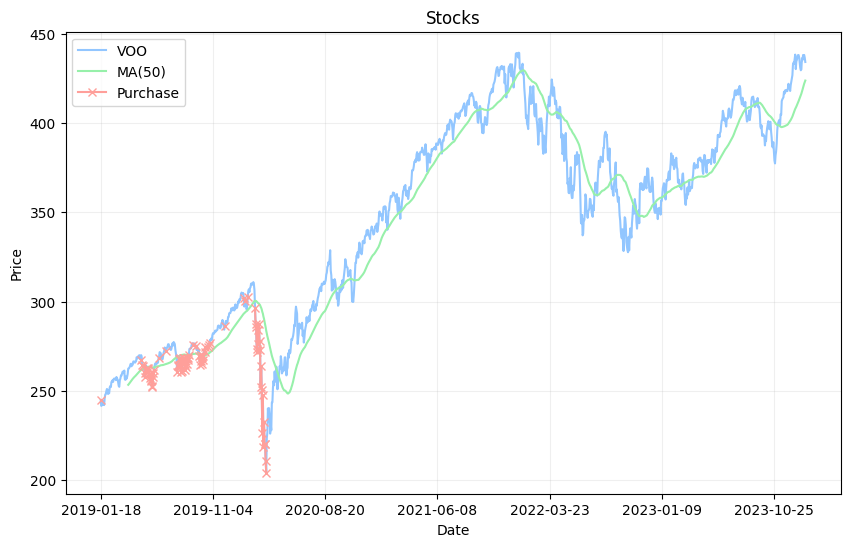

In [15]:
fig, ax = plt.subplots(figsize = (10, 6))
ts_voo['VOO'].plot(ax=ax, label='VOO')
ts_voo['sma_50'].plot(ax=ax, label='MA(50)')
ts_voo['price'].plot(marker='x', ax=ax, label='Purchase')
ax.legend()
ax.set_title("Stocks")
ax.set_ylabel("Price")
ax.set_xlabel("Date")
ax.grid(alpha=0.2)
